### Covid X Vendas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline 

In [2]:
dataframe = pd.ExcelFile("covidvsvendas22.xlsx")
dataFrame = pd.read_excel(dataframe, read_excel=None)

In [3]:
dataFrame

,Data,obitos_covid,Unidades_Vendidas
0,2020-01-01,0,191704
1,2020-02-01,0,217602
2,2020-03-01,201,177232
3,2020-04-01,5805,54580
4,2020-05-01,23308,56266
5,2020-06-01,30280,135140
6,2020-07-01,32881,184818
7,2020-08-01,28906,193421
8,2020-09-01,22571,219033
9,2020-10-01,15932,230927


In [4]:
df = dataFrame.drop(['Data'], 1, inplace = False)

In [5]:
dataset = df.dropna()

In [6]:
dataset

,obitos_covid,Unidades_Vendidas
0,0,191704
1,0,217602
2,201,177232
3,5805,54580
4,23308,56266
5,30280,135140
6,32881,184818
7,28906,193421
8,22571,219033
9,15932,230927


In [7]:
dataset.corr()

,obitos_covid,Unidades_Vendidas
obitos_covid,1.000000,0.103311
Unidades_Vendidas,0.103311,1.000000


In [8]:
dataframe = pd.ExcelFile("covidvsvendas22.xlsx")
dataFrame = pd.read_excel(dataframe, read_excel=None)

In [9]:
dataset = dataFrame.dropna()
dataset

,Data,obitos_covid,Unidades_Vendidas
0,2020-01-01,0,191704
1,2020-02-01,0,217602
2,2020-03-01,201,177232
3,2020-04-01,5805,54580
4,2020-05-01,23308,56266
5,2020-06-01,30280,135140
6,2020-07-01,32881,184818
7,2020-08-01,28906,193421
8,2020-09-01,22571,219033
9,2020-10-01,15932,230927


In [10]:
dataset.set_index('Data',inplace = True)

Text(0.5, 1.0, 'Casos de Covid e Vendas')

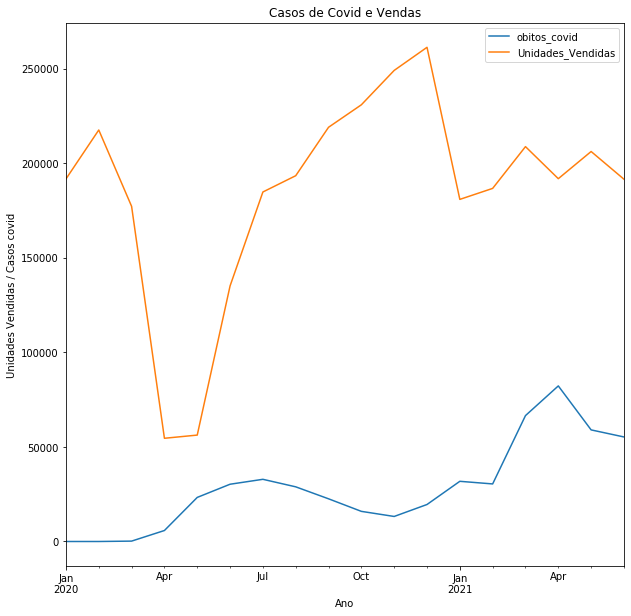

In [11]:
figura = plt.figure(figsize=(10,10))
dataset['obitos_covid'].plot()
dataset['Unidades_Vendidas'].plot()
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Unidades Vendidas / Casos covid')
plt.title('Casos de Covid e Vendas')

Text(0.5, 1.0, 'Histograma')

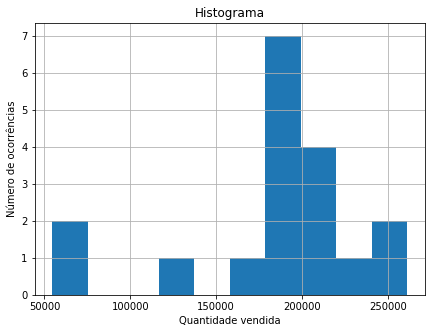

In [12]:
dataset.hist(('Unidades_Vendidas'),figsize=(7,5))
plt.xlabel('Quantidade vendida')
plt.ylabel('Número de ocorrências')
plt.title('Histograma')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import numpy as np
%matplotlib inline

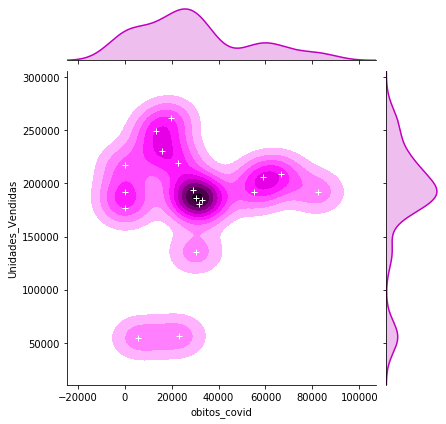

In [14]:
# Distribuição bivariada
g = sns.jointplot(x = "obitos_covid", y = "Unidades_Vendidas", data = df, kind = "kde", color = "m")
g.plot_joint(plt.scatter, c = "w", s = 30, linewidth = 1, marker = "+")
g.ax_joint.collections[0].set_alpha(0);

In [15]:
dataset.describe()

,obitos_covid,Unidades_Vendidas
count,18.000000,18.000000
mean,28781.444444,185400.888889
std,23636.153706,55110.855799
min,0.000000,54580.000000
25%,13910.000000,181882.500000
50%,26107.000000,191778.500000
75%,32616.500000,215401.750000
max,82266.000000,261321.000000


In [16]:
## Durante a covid a média de vendas foi 185400
## Menor valor de venda em um mês foi de 54580
## Maior valor de venda em um mês foi de 261321

## Analisando vendas antes do periodo da Covid-19

In [17]:
dataframe2 = pd.ExcelFile("covidvsvendas3.xlsx")
dataFrame2 = pd.read_excel(dataframe2, read_excel=None)

In [18]:
dataset3 = dataFrame2.dropna()
dataset3.describe()

,obitos_covid,Unidades_Vendidas
count,85.0,85.000000
mean,0.0,240801.835294
std,0.0,40972.045859
min,0.0,154012.000000
25%,0.0,208294.000000
50%,0.0,239856.000000
75%,0.0,263490.000000
max,0.0,332087.000000


In [19]:
## Média de vendas 234467
## Menor valor de venda 120511
## Maior valor de venda 383535